# <br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
# World Development Indicators</p><br><br>


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
#read the dataset file
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

In [3]:
data.head(20)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [4]:
countries = data['CountryName'].unique().tolist()
indicators = data['IndicatorName'].unique().tolist()

In [5]:
countries

['Arab World',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)',
 'Euro area',
 'Europe & Central Asia (all income levels)',
 'Europe & Central Asia (developing only)',
 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'High income: nonOECD',
 'High income: OECD',
 'Latin America & Caribbean (all income levels)',
 'Latin America & Caribbean (developing only)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa (all income levels)',
 'Middle East & North Africa (developing only)',
 'Middle income',
 'North America',
 'OECD members',
 'Other small states',
 'Pacific island small states',
 'Small states',
 'South Asia',
 'Sub-Saharan Africa (all income levels)',
 'Sub-Saharan Africa (developing only)',
 'Upper middle income',
 'Wor

In [5]:
len(countries)

247

In [6]:
indicators

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Arms exports (SIPRI trend indicator values)',
 'Arms imports (SIPRI trend indicator values)',
 'Birth rate, crude (per 1,000 people)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions from solid fuel consumption (% of total)',
 'Death rate, crude (per 1,000 people)',
 'Fertility rate, total (births per woman)',
 'Fixed telephone subscriptions',
 'Fixed telephone subscriptions (per 100 people)',
 'Hospital beds (per 1,000 people)',
 'International migrant stock (% of population)',
 'International migrant stock, total',
 'Life expectancy at birt

In [7]:
len(indicators)

1344

# Names of the indicators that can be included in the next phases of the currnet projects.

'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Birth rate, crude (per 1,000 people)',
 'Adult literacy rate, population 15+ years, both sexes (%)',
 'Adult literacy rate, population 15+ years, female (%)',
 'Adult literacy rate, population 15+ years, male (%)',
 'Population ages 65 and above (% of total)',
 'Population in the largest city (% of urban population)',
 'Population in urban agglomerations of more than 1 million (% of total population)',
 'Population, ages 0-14 (% of total)',
 'Population, ages 15-64 (% of total)',
 'Population, female (% of total)',
 'Population, total',

# Lets pick a country and an indicator to explore: population growth indicators and Egypt

In [4]:
# select Age
hist_indicator = 'Population, total'
hist_country = 'Egypt'
mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryName'].str.contains(hist_country)
# stage is just those indicators matching the USA for country code and CO2 emissions over time.
stage = data[mask1 & mask2]



In [10]:
stage.head(55)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
8956,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,1960,27072397.0
33533,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,1961,27810001.0
60871,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,1962,28560741.0
89279,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,1963,29322709.0
118000,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,1964,30094082.0
148239,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,1965,30872982.0
179975,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,1966,31660914.0
211766,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,1967,32456565.0
244399,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,1968,33252275.0
277156,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,1969,34038147.0


In [11]:
len(stage)

55

### Let's see how population size have changed over time in Egypt using MatplotLib

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014]
[27072397. 27810001. 28560741. 29322709. 30094082. 30872982. 31660914.
 32456565. 33252275. 34038147. 34808599. 35561087. 36302154. 37046807.
 37815578. 38624410. 39478585. 40377668. 41324806. 42321740. 43369552.
 44465918. 45610430. 46807221. 48061546. 49373806. 50748187. 52173840.
 53617678. 55035937. 56397273. 57689828. 58922018. 60108373. 61272847.
 62434527. 63595629. 64754566. 65922626. 67112877. 68334905. 69599945.
 70908710. 72247626. 73596068. 74942115. 76274285. 77605327. 78976122.
 80442443. 82040994. 83787634. 85660902. 87613909. 89579670.]


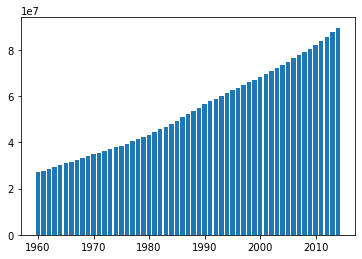

27072397.0
89579670.0


In [9]:
# get the years
years = stage['Year'].values
# get the values 
population = stage['Value'].values
print (years)
print (population)

# create
plt.bar(years,population)
plt.show()
print (min(population))
print (max(population))

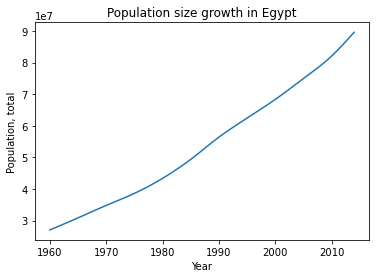

In [10]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label the figure
plt.title('Population size growth in Egypt')

# to make more honest, start they y axis at 0
#plt.axis([1960, 2014,0,100000000])

plt.show()



# what is the order of Egypt in population among all the countries in the world

In [11]:
# select population size in 2014
hist_indicator = 'Population, total'
hist_year = 2014
mask6 = data['IndicatorName'].str.contains(hist_indicator) 
mask7 = data['Year'].isin([hist_year])
# stage is just those indicators matching the USA for country code and CO2 emissions over time.
stage3 = data[mask6 & mask7]

In [12]:
stage3.head()


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5534501,Arab World,ARB,"Population, total",SP.POP.TOTL,2014,3.852725e+08
5534747,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,2014,7.013555e+06
5535067,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,2014,1.034551e+08
5535354,East Asia & Pacific (all income levels),EAS,"Population, total",SP.POP.TOTL,2014,2.264080e+09
5535752,East Asia & Pacific (developing only),EAP,"Population, total",SP.POP.TOTL,2014,2.020657e+09


In [13]:
len(stage3)

247

In [14]:
Sorted_by_PS= stage3.sort_values(by=['Value'])

In [15]:
Sorted_by_PS.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5635183,Tuvalu,TUV,"Population, total",SP.POP.TOTL,2014,9893.0
5612584,Palau,PLW,"Population, total",SP.POP.TOTL,2014,21097.0
5626935,St. Martin (French part),MAF,"Population, total",SP.POP.TOTL,2014,31530.0
5619125,San Marino,SMR,"Population, total",SP.POP.TOTL,2014,31595.0
5635080,Turks and Caicos Islands,TCA,"Population, total",SP.POP.TOTL,2014,33740.0
5596434,Liechtenstein,LIE,"Population, total",SP.POP.TOTL,2014,37286.0
5604453,Monaco,MCO,"Population, total",SP.POP.TOTL,2014,37623.0
5622523,Sint Maarten (Dutch part),SXM,"Population, total",SP.POP.TOTL,2014,37664.0
5575410,Faeroe Islands,FRO,"Population, total",SP.POP.TOTL,2014,48221.0
5601587,Marshall Islands,MHL,"Population, total",SP.POP.TOTL,2014,52898.0


# But how do the Egypt's population size in the year 2014 relate to those of other countries?

# select the top 50 countries in population size in year 2014

In [16]:
list_of_countries = stage3['CountryName'].unique()[33:]
# list_of_countries = [item.split(',')[0] for item in list_of_countries]
list_of_countries

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'Faeroe Islands', 'Fiji', 'Finland',
       'France', 

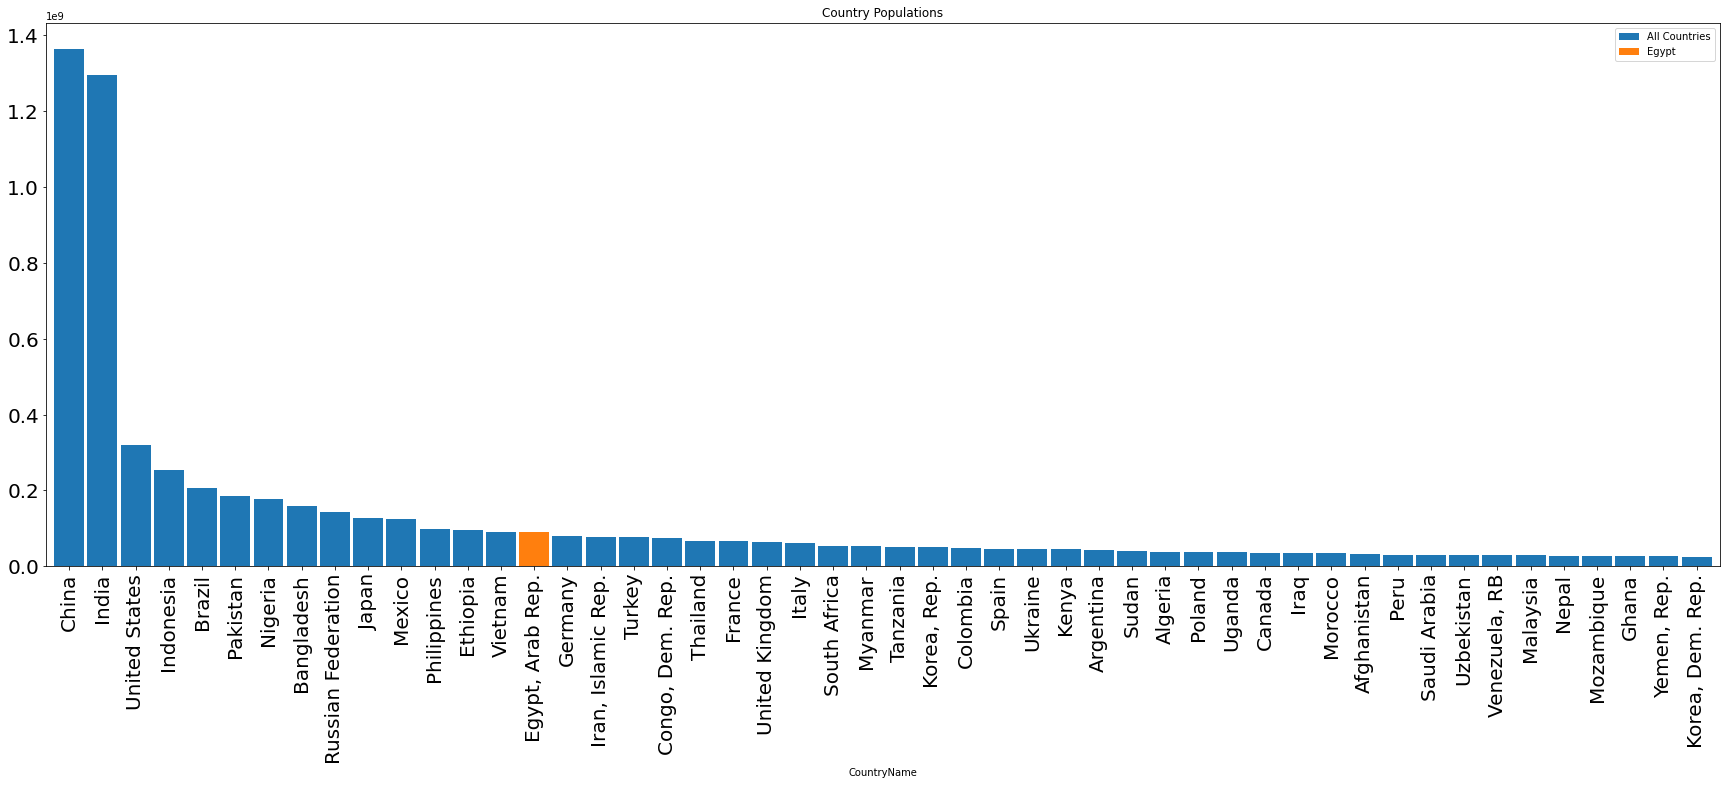

In [17]:
top50 = stage3[stage3.CountryName.isin(list_of_countries)].nlargest(50, 'Value')
top50['Egypt'] = None
top50.loc[top50['CountryName'] == 'Egypt, Arab Rep.', 'Egypt'] = top50.loc[top50['CountryName'] == 'Egypt, Arab Rep.', 'Value']
top50.loc[top50['CountryName'] == 'Egypt, Arab Rep.', 'Value'] = None
fig, ax = plt.subplots()
top50.plot(kind='bar', x='CountryName', y=['Value', 'Egypt'], figsize=(30, 10), title="Country Populations", fontsize=20, ax=ax, stacked=True, width=0.9)
# plt.arrow(14, 0.4, 0, -0.2, width=1)
ax.legend(["All Countries", "Egypt"]);
plt.show()

In [19]:
# select population size for all countries in 2014
hist_indicator = 'Population, total'
hist_year = 2014
mask7 = data['IndicatorName'].str.contains(hist_indicator) 
mask8 = data['Year'].isin([hist_year])

# apply our mask
population_2014 = data[mask7 & mask8]
population_2014.head(55)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5534501,Arab World,ARB,"Population, total",SP.POP.TOTL,2014,3.852725e+08
5534747,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,2014,7.013555e+06
5535067,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,2014,1.034551e+08
5535354,East Asia & Pacific (all income levels),EAS,"Population, total",SP.POP.TOTL,2014,2.264080e+09
5535752,East Asia & Pacific (developing only),EAP,"Population, total",SP.POP.TOTL,2014,2.020657e+09
5536185,Euro area,EMU,"Population, total",SP.POP.TOTL,2014,3.387339e+08
5536580,Europe & Central Asia (all income levels),ECS,"Population, total",SP.POP.TOTL,2014,9.031106e+08
5537046,Europe & Central Asia (developing only),ECA,"Population, total",SP.POP.TOTL,2014,2.643507e+08
5537499,European Union,EUU,"Population, total",SP.POP.TOTL,2014,5.083145e+08
5537767,Fragile and conflict affected situations,FCS,"Population, total",SP.POP.TOTL,2014,4.729547e+08


In [20]:
population_2014.head(55)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5534501,Arab World,ARB,"Population, total",SP.POP.TOTL,2014,3.852725e+08
5534747,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,2014,7.013555e+06
5535067,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,2014,1.034551e+08
5535354,East Asia & Pacific (all income levels),EAS,"Population, total",SP.POP.TOTL,2014,2.264080e+09
5535752,East Asia & Pacific (developing only),EAP,"Population, total",SP.POP.TOTL,2014,2.020657e+09
5536185,Euro area,EMU,"Population, total",SP.POP.TOTL,2014,3.387339e+08
5536580,Europe & Central Asia (all income levels),ECS,"Population, total",SP.POP.TOTL,2014,9.031106e+08
5537046,Europe & Central Asia (developing only),ECA,"Population, total",SP.POP.TOTL,2014,2.643507e+08
5537499,European Union,EUU,"Population, total",SP.POP.TOTL,2014,5.083145e+08
5537767,Fragile and conflict affected situations,FCS,"Population, total",SP.POP.TOTL,2014,4.729547e+08


In [21]:
hist_indicator = 'Population, total'
hist_year = 2014
hist_country = 'Egypt'
mask11 = data['IndicatorName'].str.contains(hist_indicator) 
mask12 = data['Year'].isin([hist_year])
mask13 = data['CountryName'].str.contains(hist_country)
# apply our mask
population_Egypt_2014 = data[mask11 & mask12 & mask13]
population_Egypt_2014.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5572929,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,2014,89579670.0


In [22]:
len(population_2014)

247

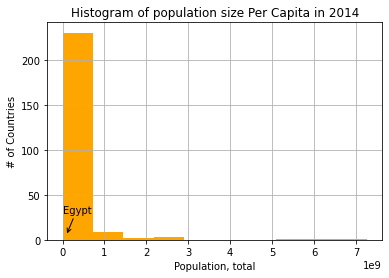

In [24]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("Egypt",
            xy=(89579670, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(population_2014['Value'], 10, density=False, facecolor='orange')

plt.xlabel(population_2014['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of population size Per Capita in 2014')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

### Investigate another correlated indicator, CO2 Emissions per capita in Egypt, which is probably affected by the exponential growth of population in Egypt 

In [80]:
# select CO2 emissions for Egypt over the years
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'Egypt'
mask3 = data['IndicatorName'].str.contains(hist_indicator) 
mask4 = data['CountryName'].str.contains(hist_country)
# stage is just those indicators matching Egypt for country code and CO2 emissions over time.
stage2 = data[mask3 & mask4]


### Let's see how emissions have changed over time using MatplotLib

In [81]:
stage2.head(60)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
8884,"Egypt, Arab Rep.",EGY,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.593007
33460,"Egypt, Arab Rep.",EGY,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.614463
60798,"Egypt, Arab Rep.",EGY,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.651081
89204,"Egypt, Arab Rep.",EGY,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.735083
117921,"Egypt, Arab Rep.",EGY,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.848084
148060,"Egypt, Arab Rep.",EGY,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1965,0.895341
179788,"Egypt, Arab Rep.",EGY,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1966,0.839008
211575,"Egypt, Arab Rep.",EGY,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1967,0.606260
244209,"Egypt, Arab Rep.",EGY,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1968,0.688797
276962,"Egypt, Arab Rep.",EGY,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1969,0.578629


[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011]
[0.59300719 0.61446312 0.65108104 0.73508304 0.84808435 0.89534098
 0.83900762 0.60626015 0.68879744 0.57862894 0.6230253  0.64809872
 0.70274946 0.64229997 0.69081869 0.80518581 0.87377673 0.9377818
 0.95133918 1.01479533 1.04312304 1.14646534 1.23925905 1.21971614
 1.32827194 1.29497434 1.4693092  1.43386929 1.39005973 1.31152901
 1.34658231 1.36446623 1.3791854  1.54980851 1.39234195 1.53318
 1.60436511 1.67095814 1.85434227 1.86839055 2.06814043 1.80246891
 1.793765   2.04800432 2.0505405  2.23116022 2.34175782 2.491357
 2.49185303 2.46224916 2.49481707 2.63511522]


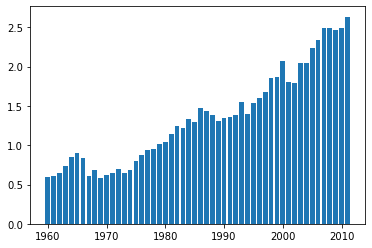

In [26]:
# get the years
years2 = stage2['Year'].values
# get the values 
CO2 = stage2['Value'].values
print (years2)
print (CO2)

# create
plt.bar(years2,CO2)
plt.show()

Turns out emissions per capita have increased in Egypt over the years but with relatively lower values compared to other high CO2 emission countries, including USA and other oil producing countries (i.e., golf countries)
let's make this graphic a bit more appealing before we continue to explore it.

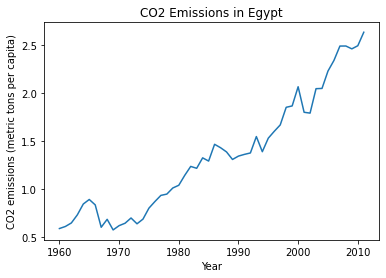

In [27]:
# switch to a line plot
plt.plot(stage2['Year'].values, stage2['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage2['IndicatorName'].iloc[0])

#label the figure
plt.title('CO2 Emissions in Egypt')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25])

plt.show()

### But how do the Egypt's numbers relate to those of other countries?

In [28]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask5 = data['IndicatorName'].str.contains(hist_indicator) 
mask6 = data['Year'].isin([hist_year])

# apply our mask
CO2_2011 = data[mask5 & mask6]
CO2_2011.head(55)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499
5029230,Euro area,EMU,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,7.132483
5029798,Europe & Central Asia (all income levels),ECS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,7.541334
5030462,Europe & Central Asia (developing only),ECA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.412707
5031318,European Union,EUU,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,7.069798
5031899,Fragile and conflict affected situations,FCS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,0.858629


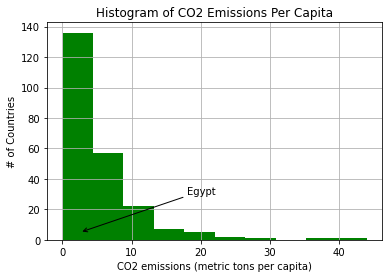

In [29]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("Egypt",
            xy=(2.6, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(CO2_2011['Value'], 10, density=False, facecolor='green')

plt.xlabel(CO2_2011['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

# Relationship between population size and GDP in Egypt¶

# investigate another correlated indicator, GDP per capita in Egypt over years and how it is correlated to the population size indicator. Also, where is Egypt among the world countries in terms of GDP compared to its position in the world in terms of population size. 


In [97]:
# select GPD
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'Egypt'
mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryName'].str.contains(hist_country)
# stage is just those indicators matching Egypt for country code and GPD over time.
GDP_Egypt = data[mask1 & mask2]

In [98]:
GDP_Egypt.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
148103,"Egypt, Arab Rep.",EGY,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1965,422.156163
179834,"Egypt, Arab Rep.",EGY,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1966,415.999823
211621,"Egypt, Arab Rep.",EGY,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1967,408.341922
244255,"Egypt, Arab Rep.",EGY,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1968,409.417271
277008,"Egypt, Arab Rep.",EGY,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1969,427.212447


[1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014]
[ 422.15616323  415.99982339  408.34192176  409.41727098  427.21244679
  441.14471095  446.66809673  446.42731254  440.53910708  442.31017056
  471.75866255  529.06377826  583.68663045  603.2711093   624.63292751
  670.56501122  678.5972899   727.11188906  760.95932632  786.2437694
  815.87552157  814.7876627   812.49055463  832.51958105  851.39507257
  878.21648187  867.80207607  887.31106148  895.0292896   912.9047246
  937.51154506  966.31087658 1001.12818577 1023.08275658 1066.29443228
 1103.44112111 1121.68522029 1127.08089343 1141.51925941 1166.46003613
 1196.73330406 1256.30375679 1322.27375592 1392.25315602 1430.91352938
 1475.13413    1470.69784974 1470.06652874 1467.61173581 1466.98499226]


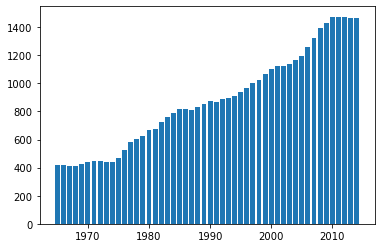

408.341921758127
1475.1341299991


In [99]:
# get the years
years = GDP_Egypt['Year'].values
# get the values 
GDP = GDP_Egypt['Value'].values
print (years)
print (GPD)

# create
plt.bar(years,GPD)
plt.show()
print (min(GPD))
print (max(GPD))

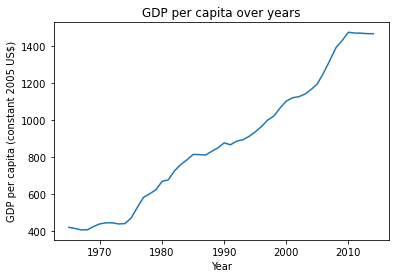

In [100]:
# switch to a line plot
plt.plot(GDP_Egypt['Year'].values, GPD_Egypt['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(GDP_Egypt['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP per capita over years')

# to make more honest, start they y axis at 0
#plt.axis([1960, 2014,0,100000000])

plt.show()

What is the order of Egypt in GPD among all the countries in the world?

In [103]:
# select GPD per capita in 2014
hist_indicator = 'GDP per capita \(constant 2005'
hist_year = 2014
mask6 = data['IndicatorName'].str.contains(hist_indicator) 
mask7 = data['Year'].isin([hist_year])
# stage is just those indicators matching Egypt for country code and GPD per capita in year 2014.
GDP_Egypt2 = data[mask6 & mask7]

In [104]:
GDP_Egypt2.head() 

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5534378,Arab World,ARB,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,4548.529662
5534629,Caribbean small states,CSS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,7458.860004
5534888,Central Europe and the Baltics,CEB,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,10646.249820
5535235,East Asia & Pacific (all income levels),EAS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,6465.238232
5535536,East Asia & Pacific (developing only),EAP,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,3253.864486


In [105]:
Sorted_by_PS= GDP_Egypt2.sort_values(by=['Value'])

In [106]:
Sorted_by_PS.tail(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5628911,Sweden,SWE,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,46066.749252
5637323,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,46405.247065
5570046,Denmark,DNK,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,47525.345089
5587384,Ireland,IRL,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,52252.346907
5597420,"Macao SAR, China",MAC,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,52255.716737
5629383,Switzerland,CHE,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,59294.760350
5584850,Iceland,ISL,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,59394.597741
5616616,Qatar,QAT,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,62168.772713
5611099,Norway,NOR,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,67228.407674
5597009,Luxembourg,LUX,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,82960.098918


# But how do the Egypt's GDP in the year 2014 relate to those of other countries?

# select the top 50 countries in GDP per capita in year 2014


In [107]:
list_of_countries = GDP_Egypt2['CountryName'].unique()[33:]
# list_of_countries = [item.split(',')[0] for item in list_of_countries]
list_of_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'Honduras', 'Hong Kong SAR, China'

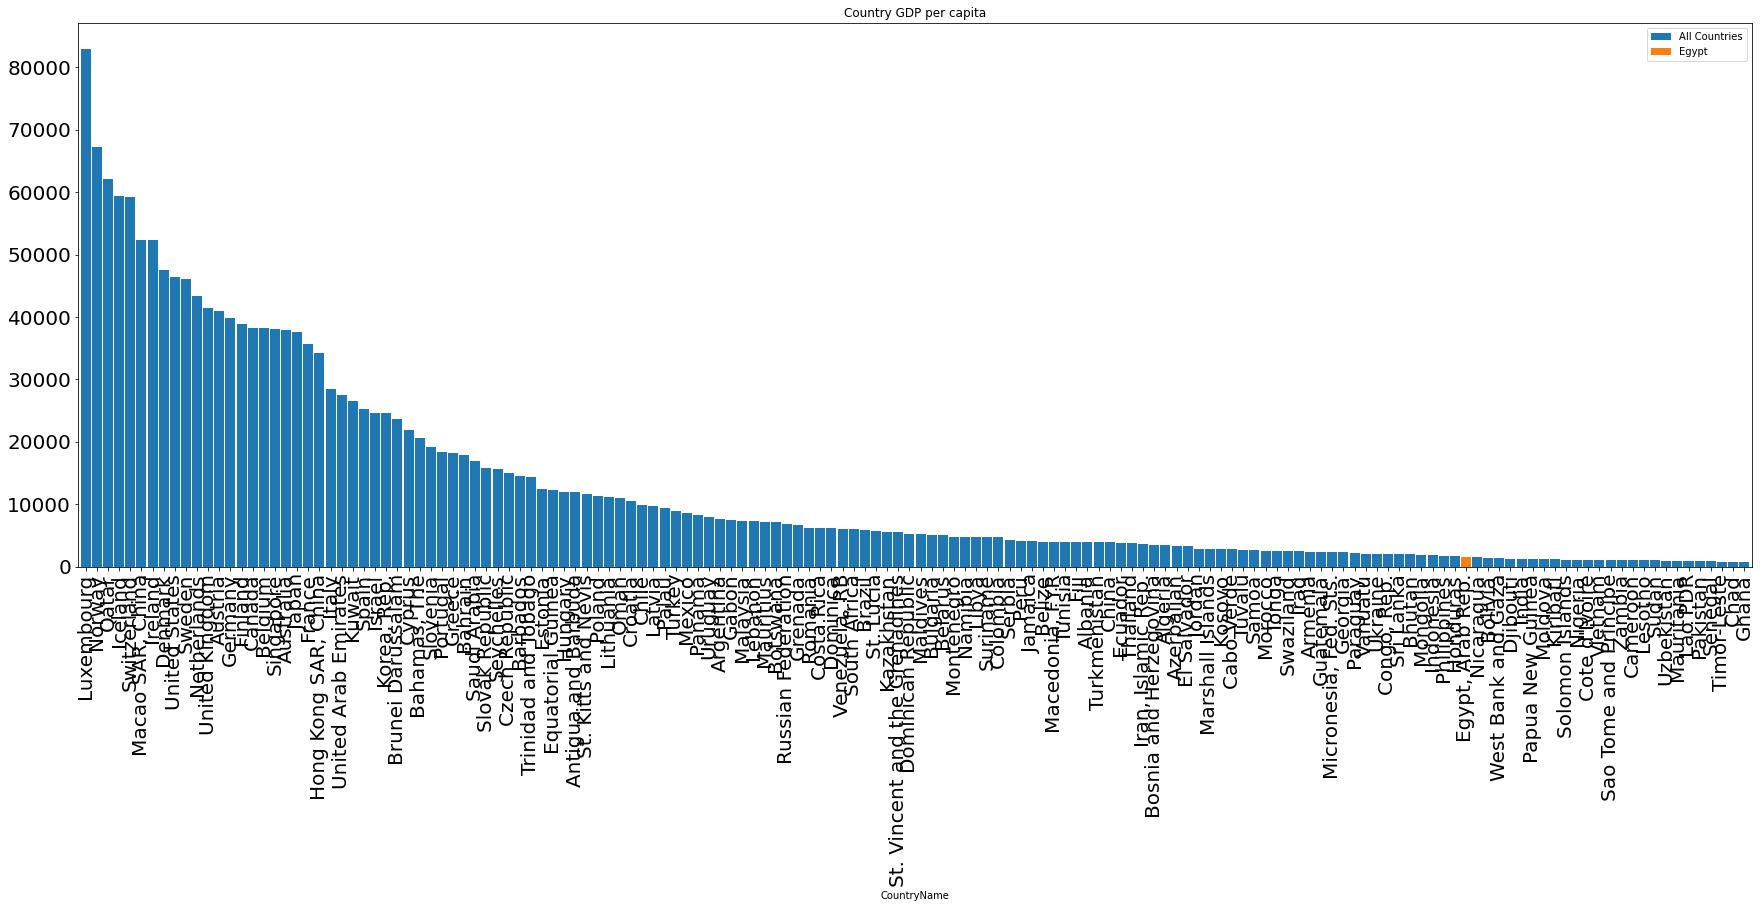

In [108]:
top50 = GDP_Egypt2[GDP_Egypt2.CountryName.isin(list_of_countries)].nlargest(150, 'Value')
top50['Egypt'] = None
top50.loc[top50['CountryName'] == 'Egypt, Arab Rep.', 'Egypt'] = top50.loc[top50['CountryName'] == 'Egypt, Arab Rep.', 'Value']
top50.loc[top50['CountryName'] == 'Egypt, Arab Rep.', 'Value'] = None
fig, ax = plt.subplots()
top50.plot(kind='bar', x='CountryName', y=['Value', 'Egypt'], figsize=(30, 10), title="Country GDP per capita", fontsize=20, ax=ax, stacked=True, width=0.9)
# plt.arrow(14, 0.4, 0, -0.2, width=1)
ax.legend(["All Countries", "Egypt"]);
plt.show()

In [110]:
# select GPD per capita in 2014
hist_indicator = 'GDP per capita \(constant 2005'
hist_year = 2014
hist_country = 'Egypt'
maskA = data['IndicatorName'].str.contains(hist_indicator) 
maskB = data['Year'].isin([hist_year])
maskC = data ['CountryName'].str.contains(hist_country)
# stage is just those indicators matching Egypt for country code and GPD per capita in year 2014.
GDP_Egypt3 = data[maskA & maskB & maskC]

In [111]:
GDP_Egypt3

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5572641,"Egypt, Arab Rep.",EGY,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,1466.984992


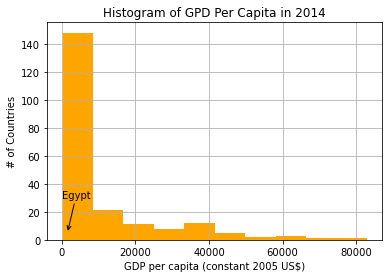

In [112]:
# let's plot a histogram of the GPD per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("Egypt",
            xy=(1466.984992, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(GDP_Egypt2['Value'], 10, density=False, facecolor='orange')

plt.xlabel(GDP_Egypt2['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of GPD Per Capita in 2014')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

### ScatterPlot for comparing GDP per capita against population size in Egypt over the years  
First, we'll need to make sure we're looking at the same time frames

In [113]:
print("GDP Min Year = ", GDP_Egypt['Year'].min(), "max: ", GDP_Egypt['Year'].max())
print("Population_size Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

GDP Min Year =  1965 max:  2014
Population_size Min Year =  1960 max:  2014


In [115]:
Population_Egypt_trunc = stage[stage['Year'] > 1964]
print(len(Population_Egypt_trunc))
print(len(GDP_Egypt))


50
50


In [116]:
print("GDP Min Year = ", GDP_Egypt['Year'].min(), "max: ", GDP_Egypt['Year'].max())
print("Population_size Min Year = ", Population_Egypt_trunc['Year'].min(), "max: ", Population_Egypt_trunc['Year'].max())

GDP Min Year =  1965 max:  2014
Population_size Min Year =  1965 max:  2014


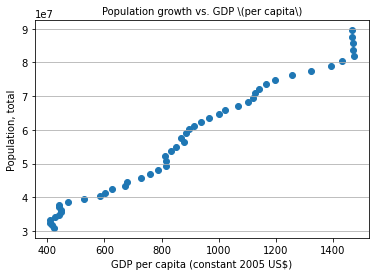

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Population growth vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(GDP_Egypt['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(Population_Egypt_trunc['IndicatorName'].iloc[0],fontsize=10)

X = GDP_Egypt['Value']
Y = Population_Egypt_trunc['Value']

axis.scatter(X, Y)
plt.show()

This look like a strong relationship (R2= 0.99).  We can test this by looking at correlation.

In [118]:
np.corrcoef(GDP_Egypt['Value'],Population_Egypt_trunc['Value'])

array([[1.        , 0.99129185],
       [0.99129185, 1.        ]])

In [119]:
GDP_Egypt.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
148103,"Egypt, Arab Rep.",EGY,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1965,422.156163
179834,"Egypt, Arab Rep.",EGY,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1966,415.999823
211621,"Egypt, Arab Rep.",EGY,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1967,408.341922
244255,"Egypt, Arab Rep.",EGY,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1968,409.417271
277008,"Egypt, Arab Rep.",EGY,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1969,427.212447


In [76]:
Population_Egypt_trunc.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
148239,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,1965,30872982.0
179975,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,1966,31660914.0
211766,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,1967,32456565.0
244399,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,1968,33252275.0
277156,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,1969,34038147.0


### ScatterPlot for comparing CO2 emission per capita against population size in Egypt over the years  
First, we'll need to make sure we're looking at the same time frames

In [82]:
print("CO2 Min Year = ", stage2['Year'].min(), "max: ", stage2['Year'].max())
print("Population_size Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

CO2 Min Year =  1960 max:  2011
Population_size Min Year =  1960 max:  2014


In [120]:
Population_Egypt_trunc = stage[stage['Year'] < 2012]
print(len(Population_Egypt_trunc))
print(len(GDP_Egypt))


52
50


In [121]:
print("CO2 Min Year = ", stage2['Year'].min(), "max: ", stage2['Year'].max())
print("Population_size Min Year = ", Population_Egypt_trunc['Year'].min(), "max: ", Population_Egypt_trunc['Year'].max())

CO2 Min Year =  1960 max:  2011
Population_size Min Year =  1960 max:  2011


In [90]:
stage2.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
8884,"Egypt, Arab Rep.",EGY,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.593007
33460,"Egypt, Arab Rep.",EGY,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.614463
60798,"Egypt, Arab Rep.",EGY,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.651081
89204,"Egypt, Arab Rep.",EGY,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.735083
117921,"Egypt, Arab Rep.",EGY,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.848084


In [91]:
Population_Egypt_trunc.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
8956,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,1960,27072397.0
33533,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,1961,27810001.0
60871,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,1962,28560741.0
89279,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,1963,29322709.0
118000,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,1964,30094082.0


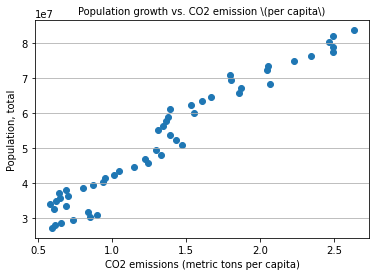

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Population growth vs. CO2 emission \(per capita\)',fontsize=10)
axis.set_xlabel(stage2['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(Population_Egypt_trunc['IndicatorName'].iloc[0],fontsize=10)

X = stage2['Value']
Y = Population_Egypt_trunc['Value']

axis.scatter(X, Y)
plt.show()

This look like a strong relationship (R2= 0.99).  We can test this by looking at correlation.

In [122]:
np.corrcoef(stage2['Value'],Population_Egypt_trunc['Value'])

array([[1.        , 0.97274466],
       [0.97274466, 1.        ]])